<a href="https://colab.research.google.com/github/CamyllaTahara/Classification_Vinho_ML/blob/main/Classifica%C3%A7%C3%A3oVinhos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importar as Bibliotecas

In [ ]:
from sklearn.datasets import load_wine #importação do dataset utilizando uma biblioteca
import numpy as np #criação de arrays, manipulação de dados
import pandas as pd #carrega o dataset
import matplotlib.pyplot as plt #cria gráficos
import seaborn as sns #cria gráficos de calor
from sklearn.model_selection import train_test_split, GridSearchCV #treino e teste/ajusta os paramêtros
from sklearn.preprocessing import StandardScaler #padroniza os dados
from sklearn.svm import SVC #modelo que será treinado
from sklearn.metrics import classification_report, confusion_matrix #cria matriz de confusão
from sklearn.inspection import permutation_importance #avalia as features
from sklearn.model_selection import cross_val_score #validação cruzada

##Carregar o dataset

In [ ]:
df = load_wine()
data = pd.DataFrame(df.data, columns=df.feature_names)
print(data.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

##Pré-Processamento de dados

In [ ]:
X = df.data
y = df.target
print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


##Treinar o modelo

In [ ]:
model = SVC(kernel="linear")
model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

##Avaliação do Modelo

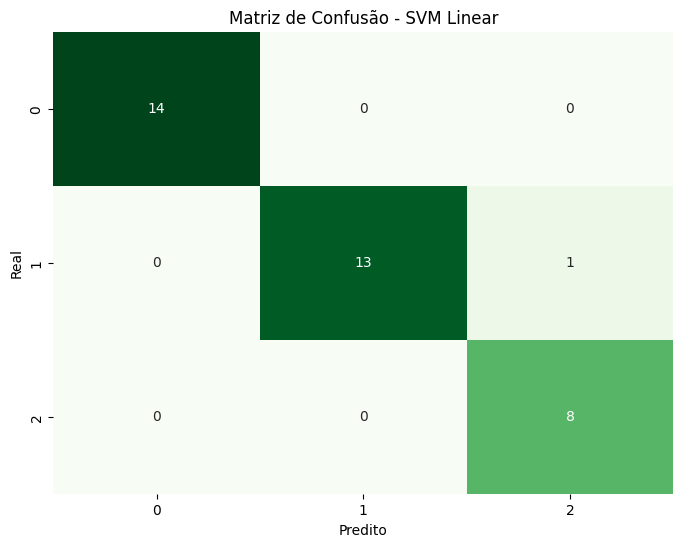

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.96        14
           2       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



In [ ]:
y_pred = model.predict(X_test_scaled) #faz previsões com o dado de teste
conf_matrix = confusion_matrix(y_test, y_pred) #Cria uma matriz que mostra as previsões corretas e incorretas
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Matriz de Confusão - SVM Linear')
plt.xlabel('Predito') #valor que o modelo estimou
plt.ylabel('Real') #valores verdadeiros
plt.show()
print(classification_report(y_test, y_pred))
#acertou 14 na classe 0 e 13 na classe 1, errou 1, uma instância da classe 1 foi classificada como 2, e previu corretamente 8 instâncias da classe 2.


##Uso do GrindSearchCV para encontrar os melhores parâmetros

In [ ]:

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear','rbf', 'poly']
}


grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, scoring='accuracy')
grid.fit(X_train_scaled, y_train)
print('Melhores parâmetros: ', grid.best_params_)
print('Melhor estimador: ', grid.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1

##Segunda Matriz de Confusão utilizando os melhores parâmetros encontrados

Acertos:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1]

 
 
 Erros:  []


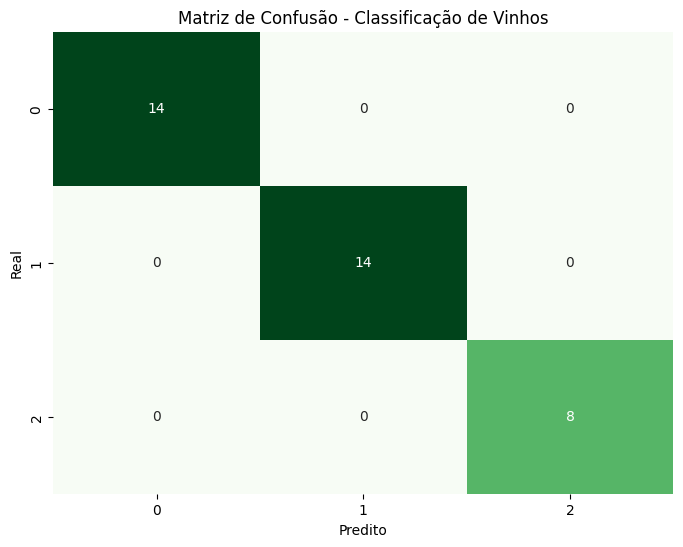

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [ ]:
grid_predictions = grid.predict(X_test_scaled)

acertos = y_test[((y_test == grid_predictions) & (y_test == 1)) ]
print('Acertos: ',acertos)



errors = y_test[(y_test != grid_predictions) ]
print('\n \n \n Erros: ', errors)



# Matriz de confusão e relatório de classificação
conf_matrix_grid = confusion_matrix(y_test, grid_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_grid, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Matriz de Confusão - Classificação de Vinhos')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()
print(classification_report(y_test, grid_predictions))

##Permutação dos Dados

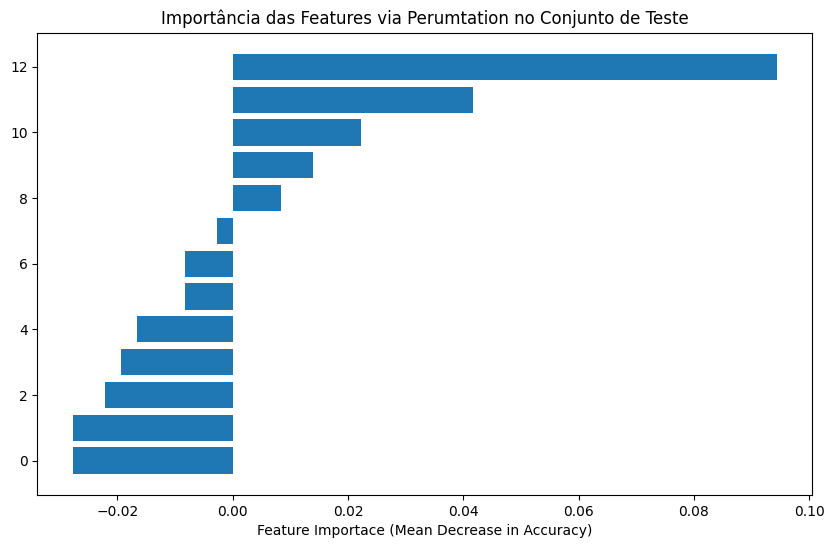

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

result =  permutation_importance(model,X_test_scaled,y_test,n_repeats=10,random_state=32)
sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(10,6))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx], align='center')
plt.xlabel('Feature Importace (Mean Decrease in Accuracy)')
plt.title('Importância das Features via Perumtation no Conjunto de Teste')
plt.show()